# Prosper Loan Data Exploration

## Preliminary Wrangling

We explore a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We consider about 15 of these variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white');

%matplotlib inline

In [2]:
# load dataset into a pandas dataframe
loan_df = pd.read_csv('../data/prosperLoanData.csv')

In [3]:
loan_df.shape

(113937, 81)

In [4]:
loan_df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### In this analysis, we will answer the following questions.
1. What factors affect a loan’s outcome status?
2. What affects the borrower's rate (interest rate)?

### The following are the features selected out of the 81 features to do our analysis and explore our questions.
* Term
* Loan Status
* BorrowerAPR
* BorrowerRate
* EstimatedReturn
* EstimatedLoss
* ProsperRating (Alpha)
* ProsperScore
* ListingCategory
* BorrowerState
* EmploymentStatusDuration
* DebtToIncomeRation
* StatedMonthlyIncome
* TotalProsperLoans
* TotalProsperPaymentsBilled
* LoanOriginalAmount

In [6]:
# Filter loan dataframe based on the features of interest.
filtered_loan_df = loan_df[[
    'Term', 'LoanStatus','BorrowerAPR','BorrowerRate',
    'EstimatedLoss','EstimatedReturn','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','EmploymentStatusDuration','DebtToIncomeRatio',
    'StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','LoanOriginalAmount',
    'LoanOriginationDate'
]]

In [7]:
filtered_loan_df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate
0,36,Completed,0.16516,0.1580,NaN,NaN,NaN,NaN,0,CO,2.0,0.17,3083.333333,NaN,NaN,9425,2007-09-12 00:00:00
1,36,Current,0.12016,0.0920,0.0249,0.05470,A,7.0,2,CO,44.0,0.18,6125.000000,NaN,NaN,10000,2014-03-03 00:00:00
2,36,Completed,0.28269,0.2750,NaN,NaN,NaN,NaN,0,GA,NaN,0.06,2083.333333,NaN,NaN,3001,2007-01-17 00:00:00
3,36,Current,0.12528,0.0974,0.0249,0.06000,A,9.0,16,GA,113.0,0.15,2875.000000,NaN,NaN,10000,2012-11-01 00:00:00
4,36,Current,0.24614,0.2085,0.0925,0.09066,D,4.0,2,MN,44.0,0.26,9583.333333,1.0,11.0,15000,2013-09-20 00:00:00


In [8]:
# Get Loan Data that Originated after July 2009
# This is because some of the variables of interest are applicable to data
# that comes after July 2009. i.e. ProsperRating, ProsperScore, EstimatedReturn, EstimatedLoss, etc
loans_after_july_2009 = filtered_loan_df.query('LoanOriginationDate > "2009-07"')

In [9]:
# rename ListingCategory (numeric)  to ListingCategory
# rename ProsperRating (Alpha) to ProsperRating
loans_after_july_2009 = loans_after_july_2009.rename(columns={"ListingCategory (numeric)": "ListingCategory", 
                                       "ProsperRating (Alpha)":"ProsperRating"})

In [10]:
# Replace the integer values with the name values for the ListingCategory
loans_after_july_2009['ListingCategory'] = loans_after_july_2009['ListingCategory'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby & Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
})

In [11]:
# Categorical Datatype Conversions
loans_after_july_2009['ListingCategory'] = loans_after_july_2009['ListingCategory'].astype('category')
loans_after_july_2009['LoanStatus'] = loans_after_july_2009['LoanStatus'].astype('category')

# Remove data without ProsperScore(s)
loans_after_july_2009 = loans_after_july_2009[loans_after_july_2009['ProsperScore'].notna()]

# Change ProsperScore to String.
loans_after_july_2009['ProsperScore'] = loans_after_july_2009['ProsperScore'].astype(int).astype(str)


# Change Term to Str and then to Category type
loans_after_july_2009['Term'] = loans_after_july_2009['Term'].astype(str)


# Ordered Categorical Data for some variables
# Convert Term, ProsperScore, and ProsperRating into ordered categorical types
ordinal_var_dict = {
                    'Term': ['12', '36','60'],
                    'ProsperScore': ['1','2','3 ','4','5','6','7','8','9','10','11'],
                    'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_after_july_2009[var] = loans_after_july_2009[var].astype(ordered_var)

## Univariate Exploration

In [12]:
loans_after_july_2009.describe()

,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,LoanOriginalAmount
count,84853.000000,84853.000000,84853.000000,84853.000000,84834.000000,77557.000000,8.485300e+04,19797.000000,19797.000000,84853.000000
mean,0.226658,0.196022,0.080306,0.096068,103.055320,0.258752,5.931175e+03,1.460676,24.303733,9083.440515
std,0.079916,0.074631,0.046764,0.030403,97.078884,0.318326,8.239944e+03,0.790446,19.771447,6287.860058
min,0.045830,0.040000,0.004900,-0.182700,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.000000
25%,0.163280,0.135900,0.042400,0.074080,30.000000,0.150000,3.434000e+03,1.000000,10.000000,4000.000000
50%,0.219450,0.187500,0.072400,0.091700,74.000000,0.220000,5.000000e+03,1.000000,18.000000,7500.000000
75%,0.292540,0.257400,0.112000,0.116600,148.000000,0.320000,7.083333e+03,2.000000,35.000000,13500.000000
max,0.423950,0.360000,0.366000,0.283700,755.000000,10.010000,1.750003e+06,8.000000,141.000000,35000.000000


In [13]:
default_colour = sns.color_palette()[0]

In [14]:
# Dictionary of Numerical Variables and Some properties to be used in plotting their distributions
numerical_variables = { 
    'BorrowerAPR': {'binsize': 0.01, 'x_label': 'Borrower\'s Annual Percentage Rate'},
    'BorrowerRate': {'binsize': 0.005, 'x_label': 'Borrower\'s Interest Rate'},
    'EstimatedLoss': {'binsize': 0.005, 'x_label': 'Estimated Loss'},
    'EstimatedReturn': {'binsize': 0.005, 'x_label': 'Estimated Returns'},
    'StatedMonthlyIncome': {'binsize': 10000, 'x_label': 'Monthly Income'},
    'EmploymentStatusDuration': {'binsize': 10, 'x_label': 'Duration of Employment'},
    'DebtToIncomeRatio': {'binsize': 0.1, 'x_label': 'Debt to Income Ratio'},
    'TotalProsperLoans': {'binsize': 0.4, 'x_label': 'Total Prosper Loans'},
    'TotalProsperPaymentsBilled': {'binsize': 3, 'x_label': 'Total Prosper Payments Billed'},
    'LoanOriginalAmount': {'binsize': 1000, 'x_label': 'Loan Original Amount'},
}

In [15]:
# Helper function to plot distributions
def plot_distribution(data, binsize, x_label):
    bins = np.arange(data.min(), data.max()+binsize, binsize)
    plt.hist(data,bins=bins)
    plt.xlabel(x_label)
    plt.show();

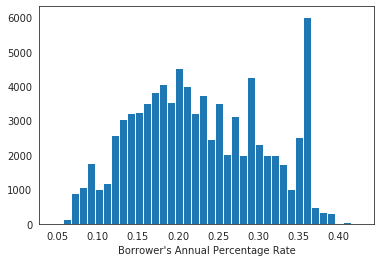

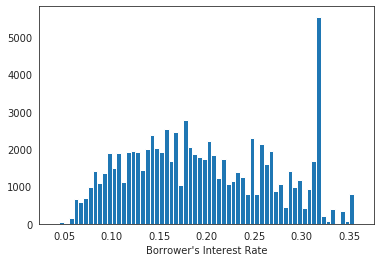

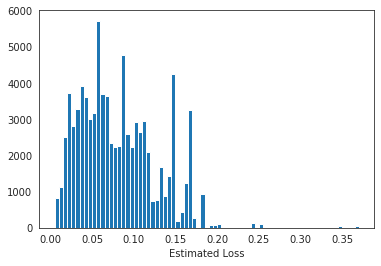

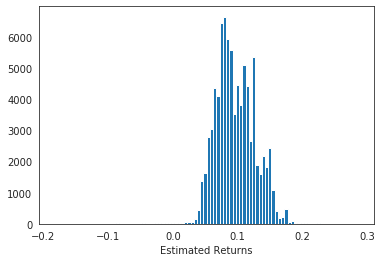

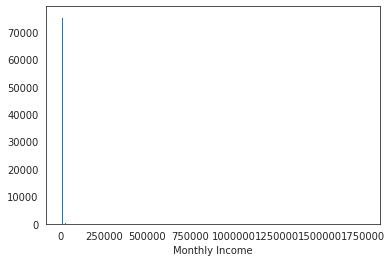

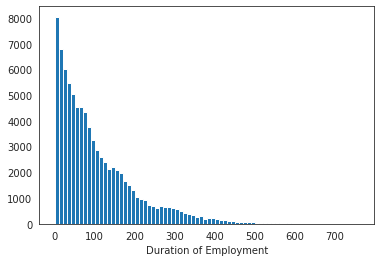

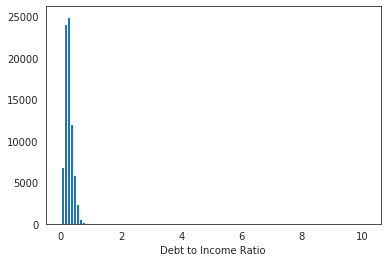

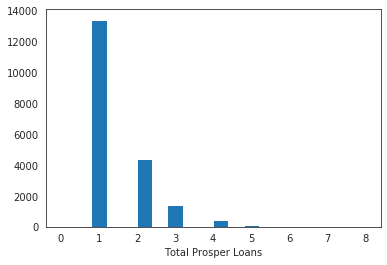

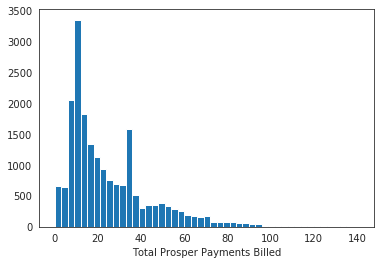

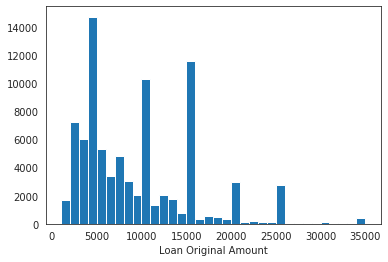

In [16]:
# Plot distribution of numerical variables.
for var in numerical_variables:
    plot_distribution(loans_after_july_2009[var], 
                      numerical_variables[var]['binsize'],
                      numerical_variables[var]['x_label']
                     )

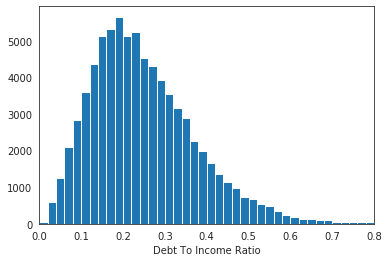

In [17]:
# DebtToIncomeRatio
bins = np.arange(loans_after_july_2009['DebtToIncomeRatio'].min(),
                 loans_after_july_2009['DebtToIncomeRatio'].max()+0.02, 0.02)
plt.hist(loans_after_july_2009['DebtToIncomeRatio'],bins=bins)
plt.xlabel('Debt To Income Ratio');
plt.xlim(0,0.8);

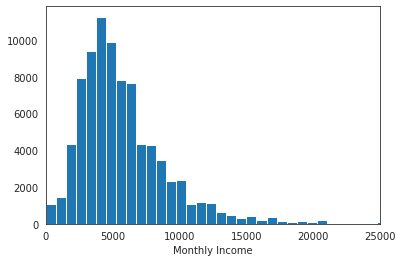

In [18]:
# MonthlyIncome has a Huge Outlier of 1750000
# Zoom into plot to get a clearer distribution 
bins = np.arange(loans_after_july_2009['StatedMonthlyIncome'].min(),
                 loans_after_july_2009['StatedMonthlyIncome'].max()+750, 750)
plt.hist(loans_after_july_2009['StatedMonthlyIncome'], bins=bins)
plt.xlabel('Monthly Income');
plt.xlim(0,25000);

### Observations from Numerical Variable Distributions

* The Borrower's Interest Rate and the Borrower's Annual Percentage Rate appear to have a similar distribution. We see the modal Interest Rate between approximately 0.30 to 0.33.
* Most of the Borrowers have a 0 employment duration; unemployed with a decreasing number as the months increases. This observation is quite interesting because one will wonder how the unemployed will be able to pay back their loans within the expected repayment period.
* For the amounts borrowed, that is the Loan Original Amount, we observe higher spikes for loans of 5000, 15000, 10000, 20000, 25000 in descending order. (all in US Dollars)
* The Monthly Income of the borrowers saw a very huge outlier of 1,750,000USD which caused the distribution to be highly skewed. We zoom into the distribution with a limit of 25,000USD; the highest value where most of the distribution fall. Most of them have a monthly income of 5000USD.
* The DebtToIncomeRatio appears skewed to the right. It appears there are very few people whose debts almost equals their income. This initial observation makes us understand that most of the Borrowers are not overwhelmed with debt compared to their income.

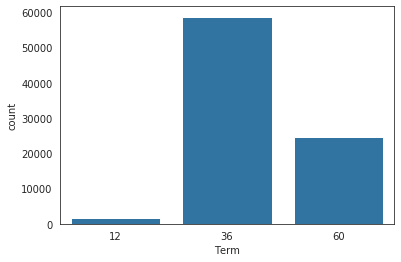

In [19]:
# LoanTerm
default_colour = sns.color_palette()[0]
sns.countplot(data=loans_after_july_2009, x='Term', color=default_colour);

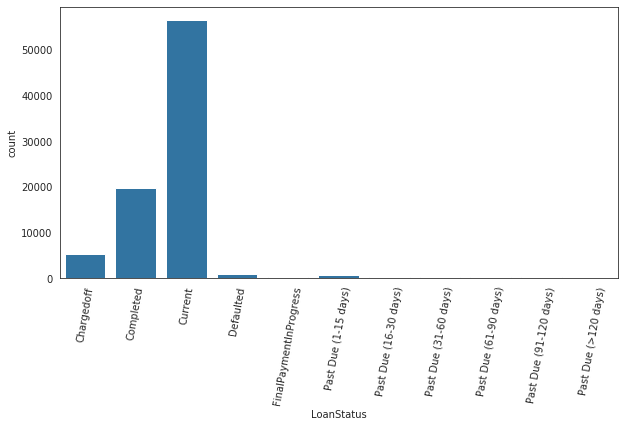

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=loans_after_july_2009, x='LoanStatus', color=default_colour);
plt.xticks(rotation=80);

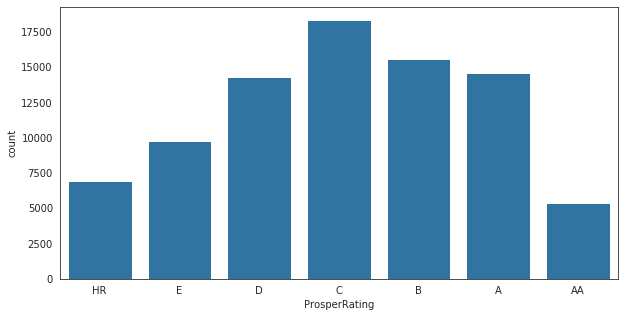

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=loans_after_july_2009, x='ProsperRating', color=default_colour);

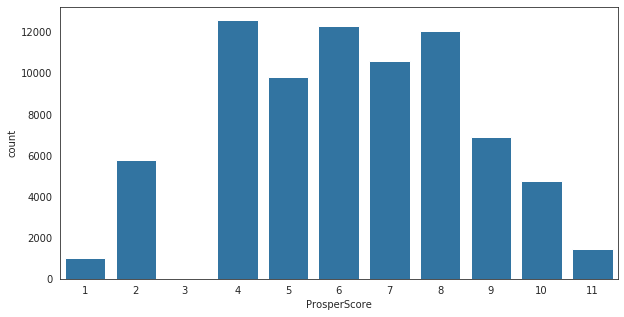

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=loans_after_july_2009, x='ProsperScore', color=default_colour);

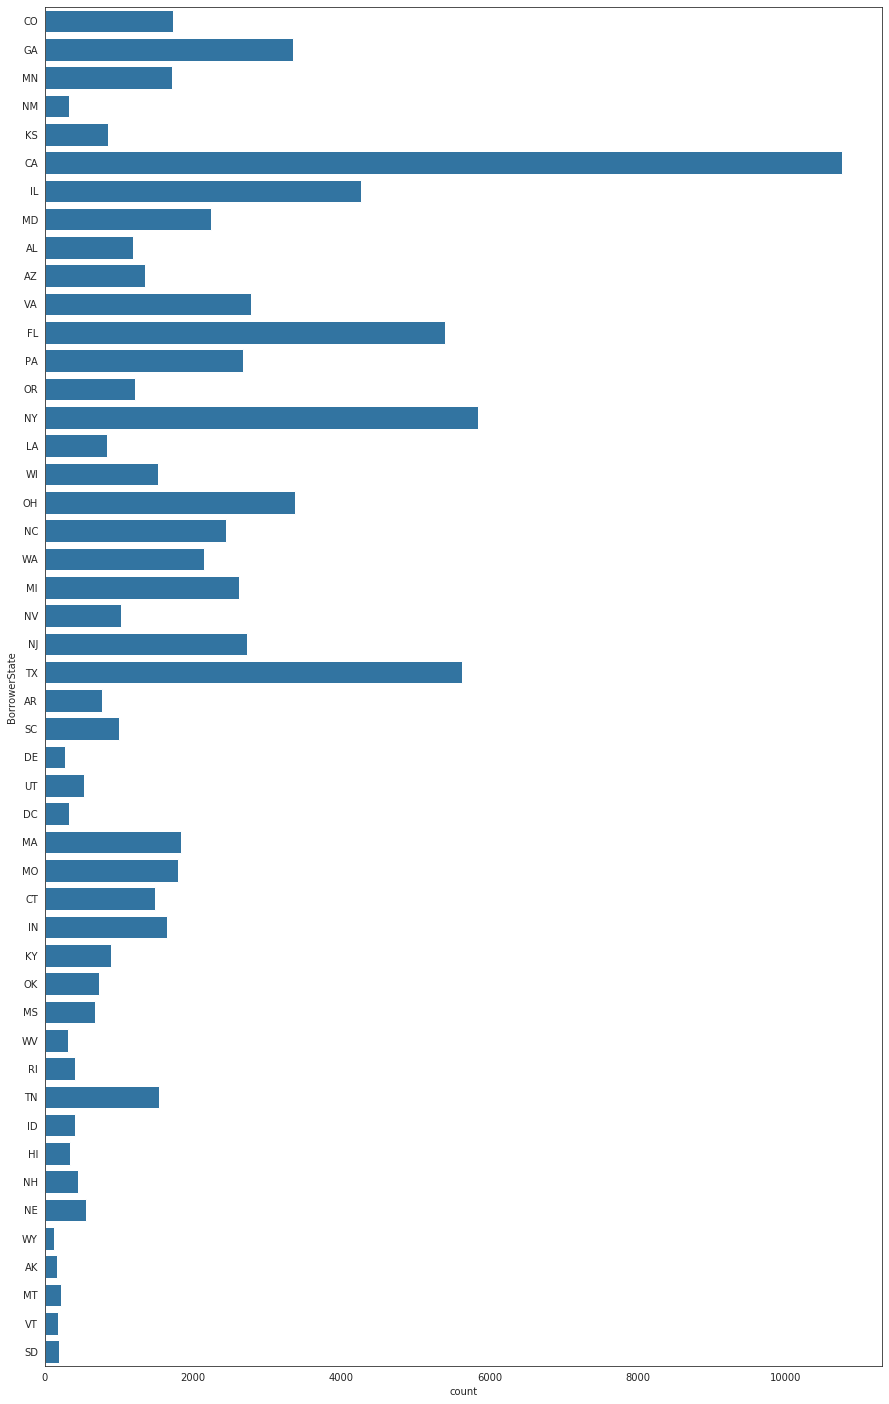

In [23]:
plt.figure(figsize=(15,25))
sns.countplot(data=loans_after_july_2009, y='BorrowerState', color=default_colour);

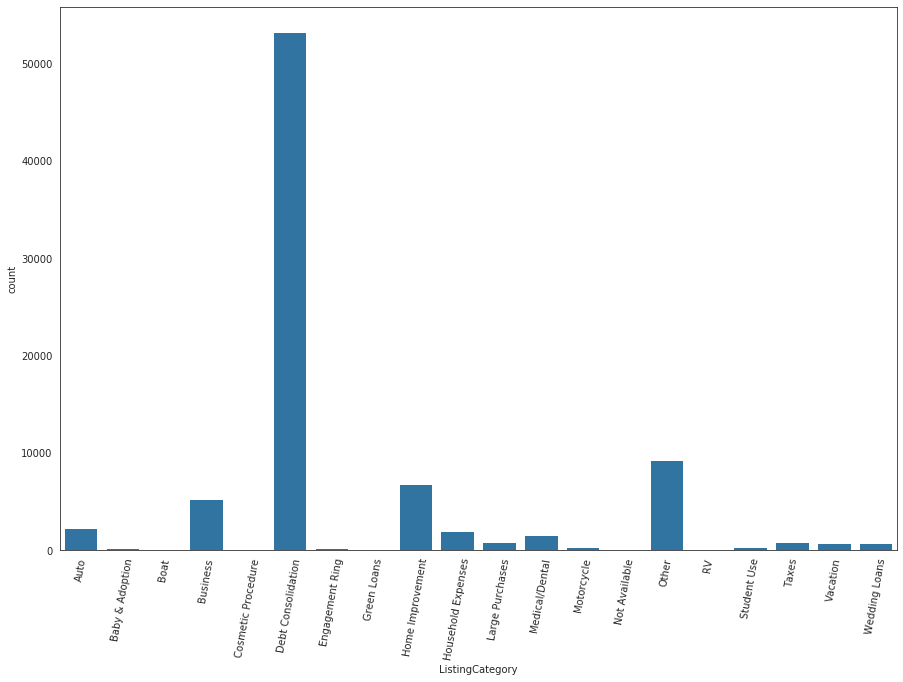

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data=loans_after_july_2009, x='ListingCategory', color=default_colour);
plt.xticks(rotation=80);

### Observations from Categorical Data Distribution
* Most of the loans were taken to pay off other Loans; i.e **Debt Consolidation**. This is followed by those that fall in the **Other** Category, **Home Improvement, Business and Auto**
* Most of the Loan Borrowers are in **California State**. **Florida**, **New York** and **Texas** recorded almost same number of Borrowers.
* Most of them have a ProsperRating of **C**.
* None of them had a ProsperScore of **3**, with most of them having a score of **4 to 8**.
* Most Loans were taken for a **36 month** period followed by **60 months and 12 months**.
* Most of the Loans recorded have a **Current** status followed by **Completed** and **Chargedoff**.

## Bivariate Exploration

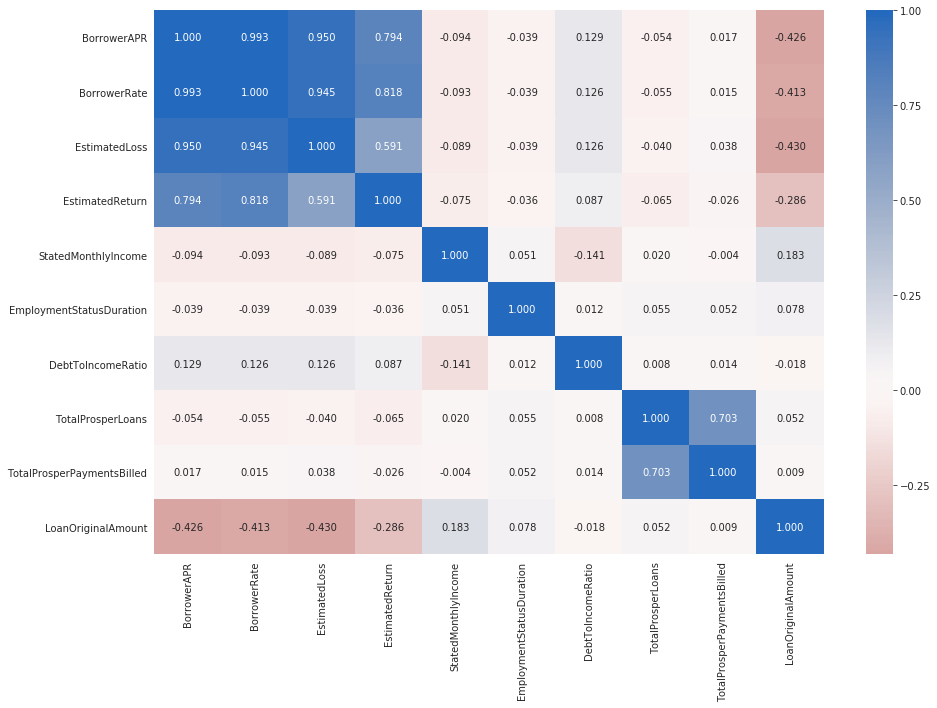

In [25]:
# Correlation Plot for All Numerical Variables
plt.figure(figsize=[15,10])
ax = sns.heatmap(loans_after_july_2009[numerical_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
ax.set_ylim(len(numerical_variables),0)

plt.show()

/home/mupati/anaconda3/envs/datascience/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/mupati/anaconda3/envs/datascience/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mupati/anaconda3/envs/datascience/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


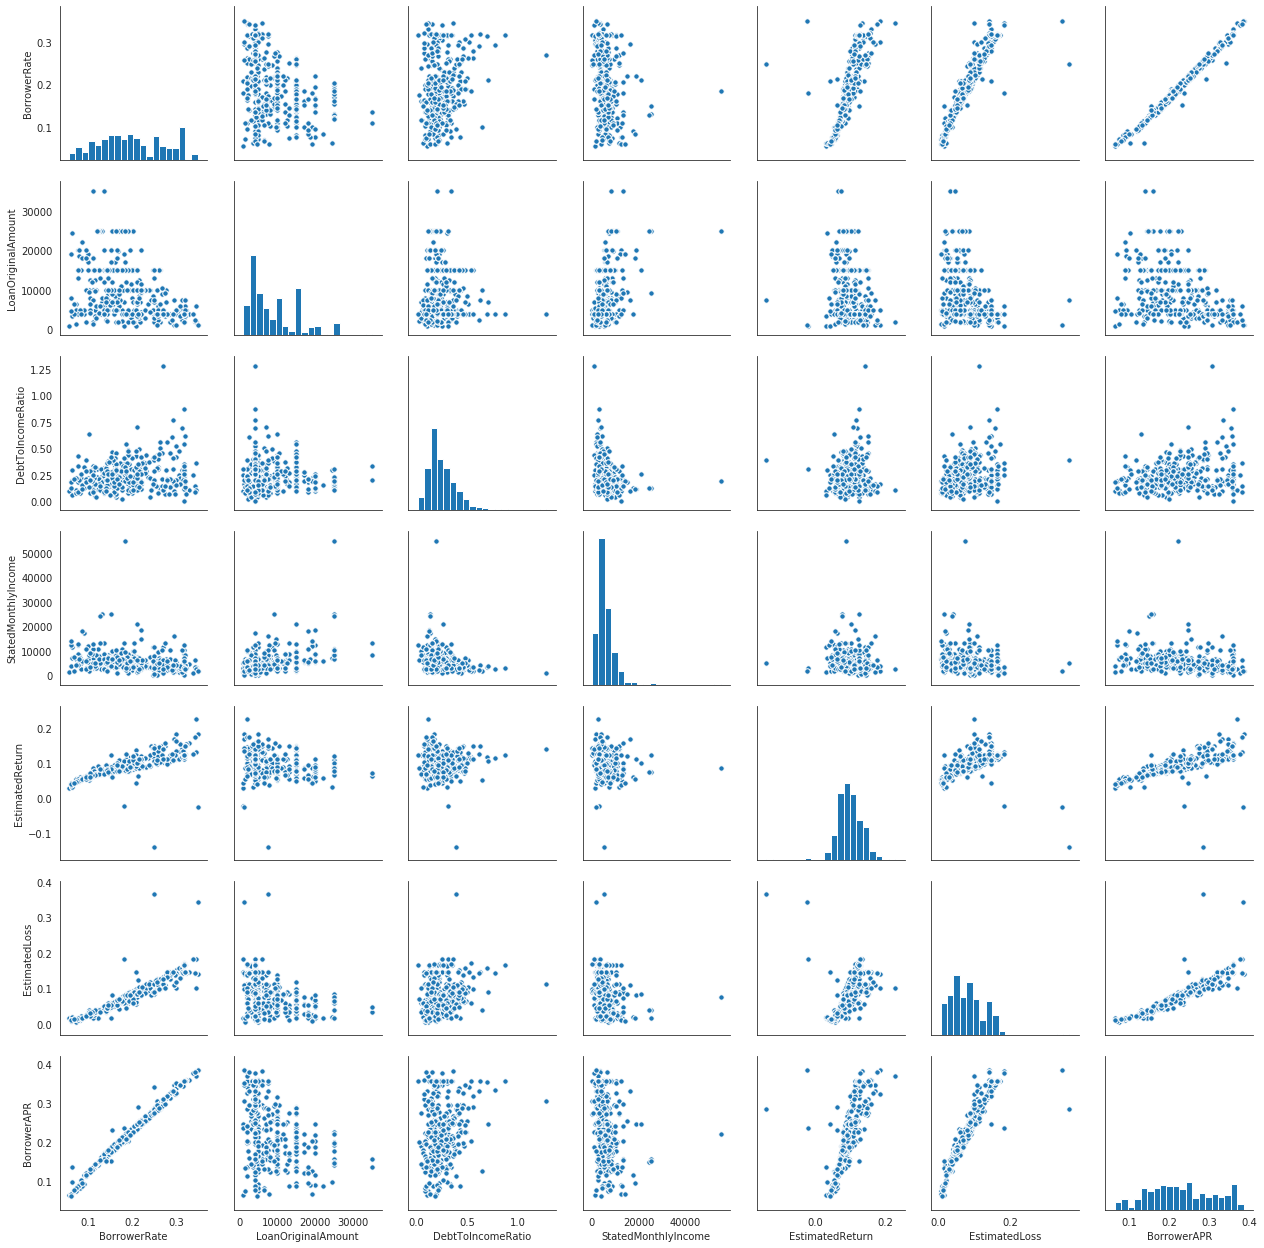

In [26]:
# plot matrix: sample 500 loan_data so that plots are clearer and they render faster
num_var = ['BorrowerRate','LoanOriginalAmount','DebtToIncomeRatio','StatedMonthlyIncome',
    'EstimatedReturn','EstimatedLoss','BorrowerAPR']
samples = np.random.choice(loans_after_july_2009.shape[0], 500, replace = False)
loans_sample = loans_after_july_2009.loc[samples,:]
g = sns.PairGrid(data = loans_sample, vars = num_var);
g = g.map_diag(plt.hist, edgecolor='w', bins=20);
g.map_offdiag(plt.scatter, edgecolor='w', s=30);

### Observations
* As observed in the individual distributions, BorrowerAPR and BorrowerRate have a very high positive correlation
* Higher LoanOriginalAmount didn't necessarily have a high Interest Rate. It appears Higher Loan Amounts have a smaller BorrowerRate (Interest Rate). This will be further investigated.
* The Plot for EstimatedReturn and EstimatedLoss appear to have a positive correlation with BorrowerRate.
* There is no clear correlation between the StatedMonthlyIncome and the BorrowerRate or the DebtToIncomeRatio and the BorrowerRate.

### Factors that Influence BorrowerRate(Interest Rate)

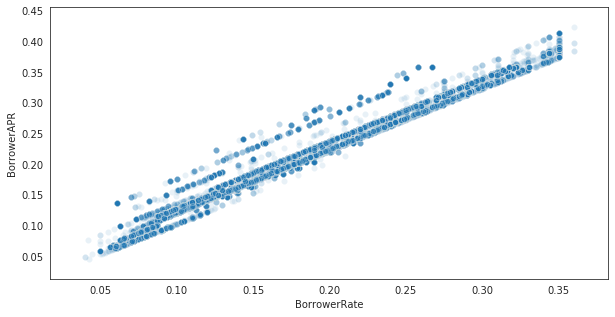

In [27]:
# BorrowerRate + BorrowerAPR
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans_after_july_2009, x='BorrowerRate', y="BorrowerAPR", alpha=1/10);

# It's understable that the BorrowerRate and BorrowerAPR have a high positive correlation
# The BorrowerRate is also a component of the Borrower's Annual Percentage Rate (APR)

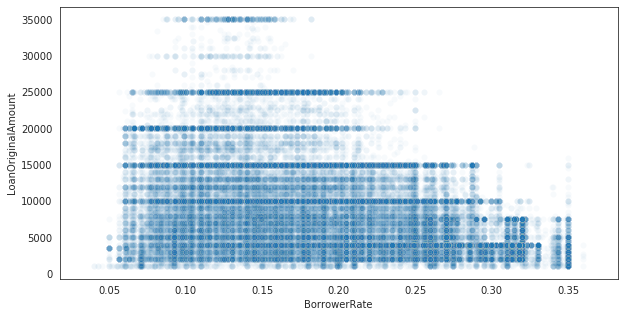

In [28]:
# BorrowerRate + Loan Original Amount
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans_after_july_2009, x='BorrowerRate', y="LoanOriginalAmount", alpha=1/30);

# Higher Loan Amount didn't necessarily have a high Interest Rate.
# It appears Higher Loan Amounts have a smaller BorrowerRate (Interest Rate)

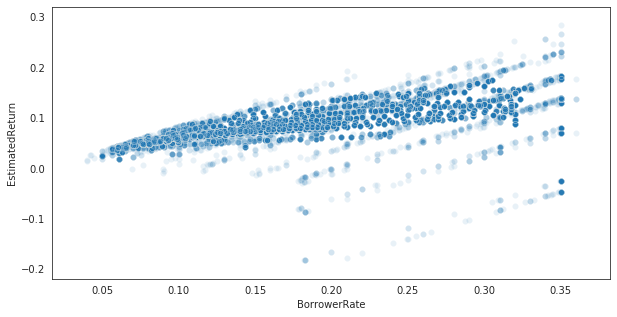

In [29]:
# BorrowerRate + Estimated Return
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans_after_july_2009, x='BorrowerRate', y="EstimatedReturn", alpha=1/10);

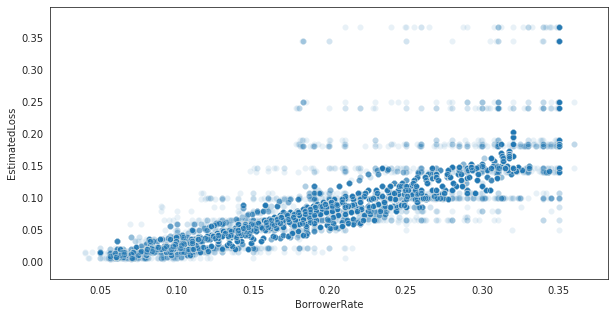

In [30]:
# BorrowerRate + EstimatedLoss
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans_after_july_2009, x='BorrowerRate', y="EstimatedLoss",alpha=1/10);

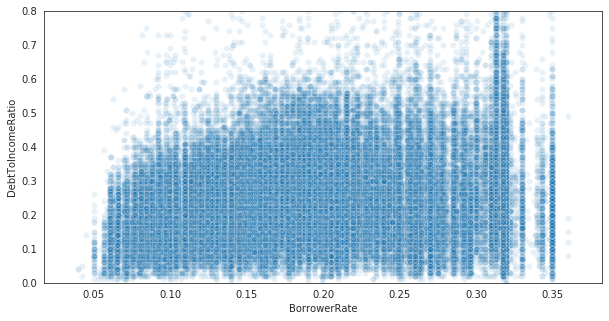

In [31]:
# BorrowerRate + DebtToIncomeRatio
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans_after_july_2009, x='BorrowerRate', y="DebtToIncomeRatio", alpha=1/10);
plt.ylim(0,0.8);

# There was no clear correlation between the BorrowerRate and the DebtToIncomeRatio.
# However what we observe is that most of the higher DebtToIncomeRatio values have a BorrowerRate that
# ranges from approximately 0.31 to 0.33.

### Observations on Relationship Between BorrowerRate(Interest Rate) and Numerical Variables.
* **DebtToIncomeRatio:** There was no clear correlation between the BorrowerRate and the DebtToIncomeRatio. However what we observe is that most of the higher DebtToIncomeRatio values have a BorrowerRate that ranges from approximately 0.31 to 0.33.
* **EstimatedLoss and EstimatedReturn:** Both variables had a positive correlation with the BorrowerRate.
* **LoanOriginalAmount:** The smaller LoanOriginalAmounts recorded Higher Interest Rates. It appears Higher Loan Amounts have a smaller BorrowerRate (Interest Rate).
* **BorrowerAPR**: It's understable that the BorrowerRate and BorrowerAPR have a high positive correlation. The BorrowerRate is also a component of the Borrower's Annual Percentage Rate (APR)

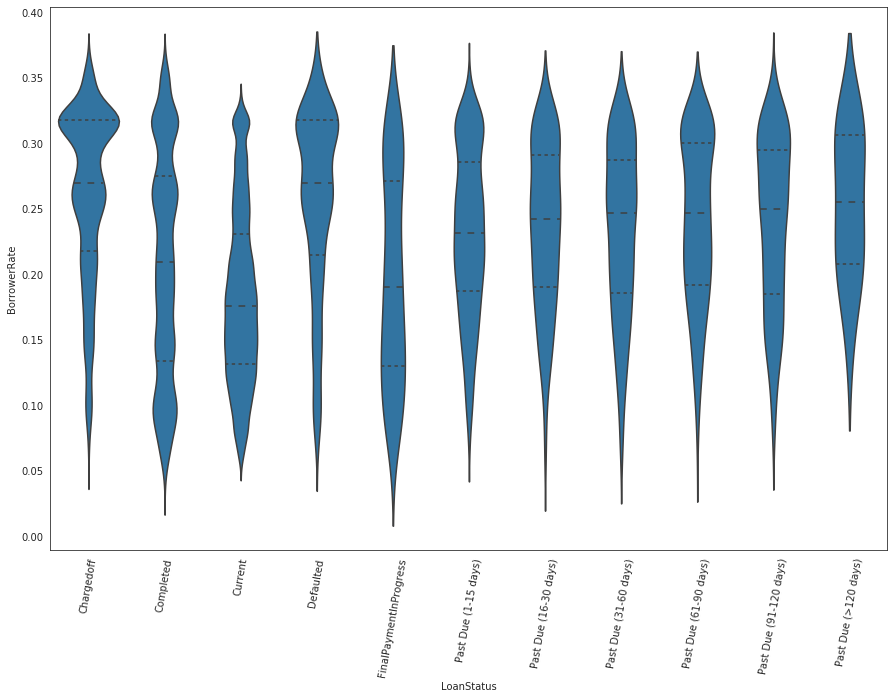

In [32]:
# BorrowerRate + LoanStatus
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009,y='BorrowerRate',x='LoanStatus',color=default_colour,inner='quartile');
plt.xticks(rotation=80);
# Most of the loans that were chargeof had high interest rates folowed by Defaulted Loans
# The Completed Loans have a fair distribution across the quartiles
# Most of the Current Loans have a lesser Interest Rate.
# The remaining have a fairly equal distribution of Interest Rates.

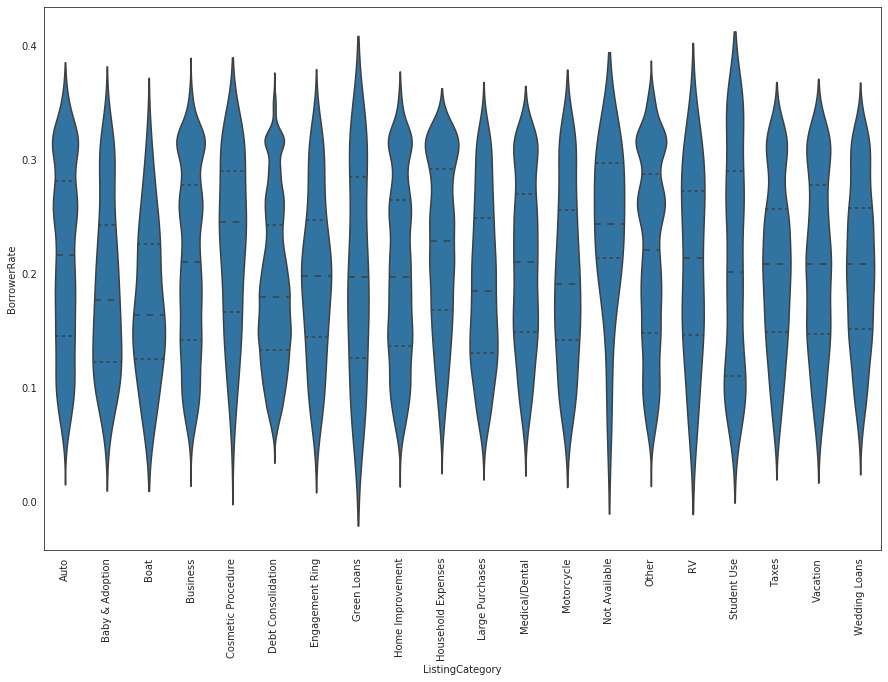

In [33]:
# BorrowerRate + ListingCategory
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, y='BorrowerRate', x='ListingCategory', color=default_colour,
              inner='quartile');
plt.xticks(rotation=90);
# Considering the Categories that recorded the highest values in our Univariate Analysis of the Listing Category
# most of the DebtConsolidation Category had a smaller BorrowerRate, below 0.2 which happens to be the
# approximate Median we observe. Business, Home Improvement and Auto Loans had a fairly uniform distribution
# though the  Upper Quartiles have a higher BorrowerRate. 

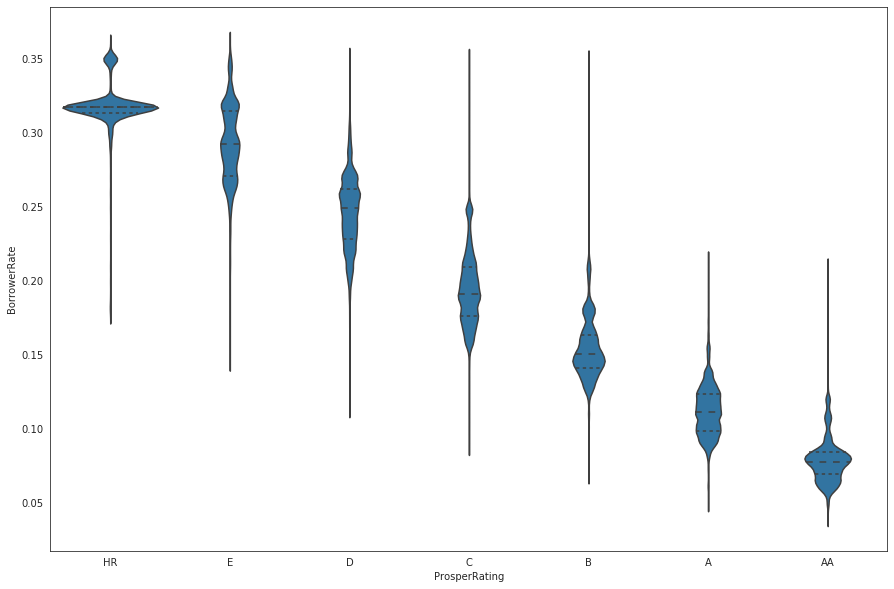

In [34]:
# BorrowerRate + ProsperRating
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, y='BorrowerRate', x='ProsperRating', color=default_colour,
              inner="quartile");
# We observe that the BorrowerRate (Interest Rates) decrease as we move from HR to AA across the
# Prosper Ratings

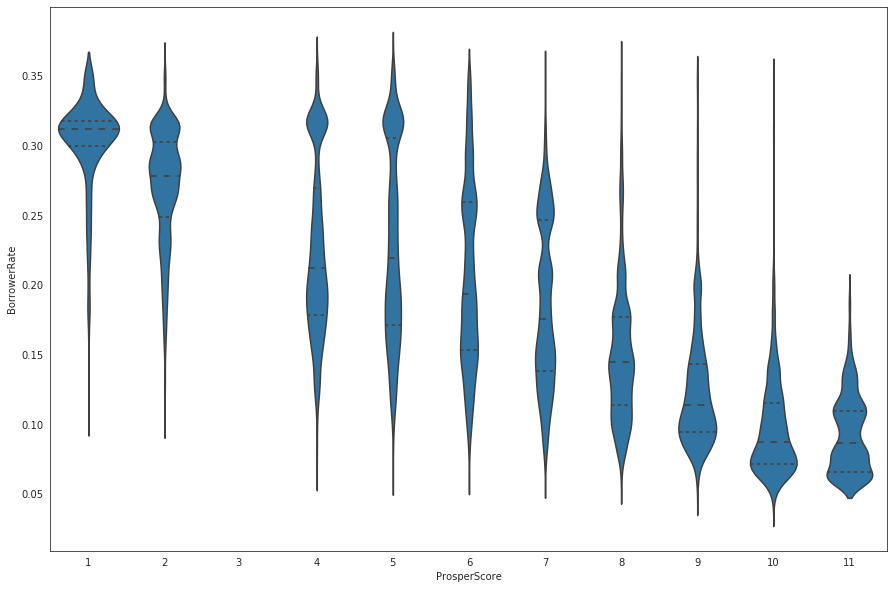

In [35]:
# BorrowerRate + ProsperScore
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, y='BorrowerRate', x='ProsperScore', color=default_colour,
              inner="quartile");

# Loans with high risk score have higher BorrowerRates as we see with ProsperScore of 1 and 2. Lower Risk Scores
# of 9,10,11 record lower interest rates. The BorrowerRates generally decline from ProsperScore of 1 to 11

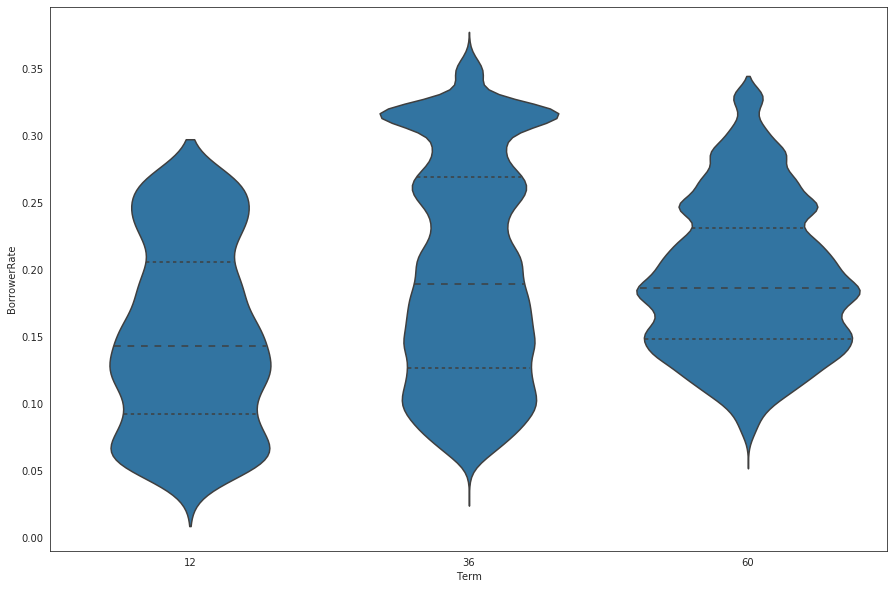

In [36]:
# BorrowerRate + Term
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, y='BorrowerRate', x='Term', color=default_colour,
              inner="quartile");
# Loans taken for 12months have a lesser Interest Rate
# Loans taken for 36 and 60 months have almost the same Median Interest rates but 
# the 36 month Loan term generally have higher Interest Rate

### Observations on Relationship Between BorrowerRate(Interest Rate) and Categorical Variables.

* **Loan Term:** Loans taken for 12months have a lesser Interest Rate. Loans taken for 36 and 60 months have almost the same Median Interest rates but the 36 month Loan term generally have higher Interest Rate.
* **Prosper Score:** Loans with high risk scores have higher BorrowerRates as we see with ProsperScore of 1 and 2. Lower Risk Scores of 9,10,11 record lower interest rates. The BorrowerRates generally decline from ProsperScore of 1 to 11, i.e higher risk to Lower Risk.
* **Prosper Rating:** We observe that the BorrowerRate decrease as we move from HR to AA across the Prosper Ratings.
* **Listing Category:** Considering the Categories that recorded the highest values in our Univariate Analysis, most of the DebtConsolidation Category had a smaller BorrowerRate, below 0.2 which happens to be the approximate Median we observe. Business, Home Improvement and Auto Loans had a fairly uniform distribution though the  Upper Quartiles have a higher BorrowerRate.
* **Loan Status:** Most of the loans that were **Chargedof** had high interest rates folowed by **Defaulted** Loans. The **Completed** Loans have a fair distribution across the quartiles. Most of the **Current** Loans have a lesser Interest Rate.The remaining have a fairly equal distribution of Interest Rates. 

### Factors that influence Loan Status

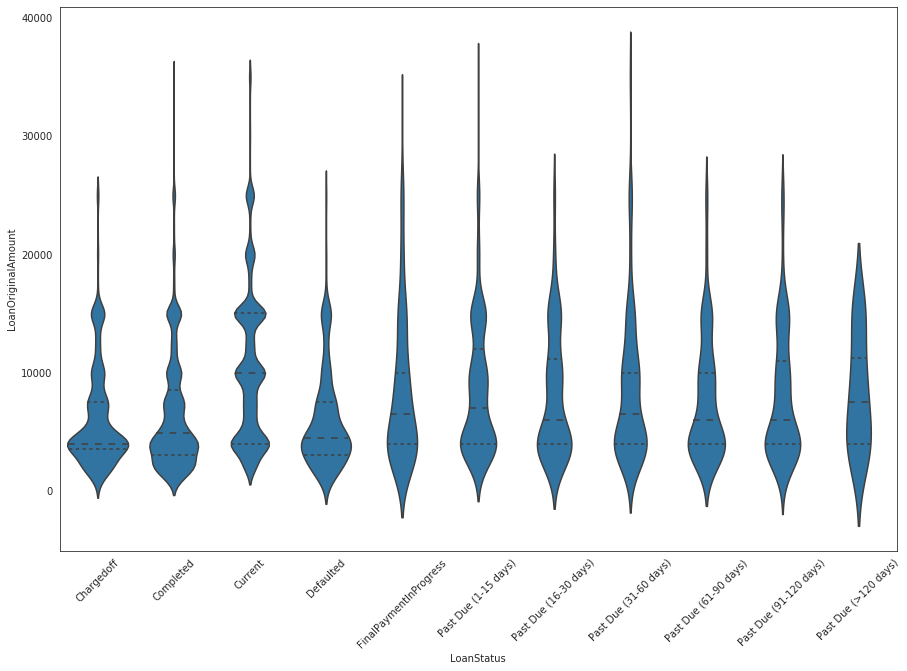

In [37]:
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, x='LoanStatus', y='LoanOriginalAmount',
               inner="quartile", color=default_colour);
plt.xticks(rotation=45);

# Most of the loans in the ChargedOff, Completed and Defaulted Status had Smaller LoanOriginalAmount
# We have to find out why these small loans couldn't be paid off but had to be Defaulted or ChargedOff.

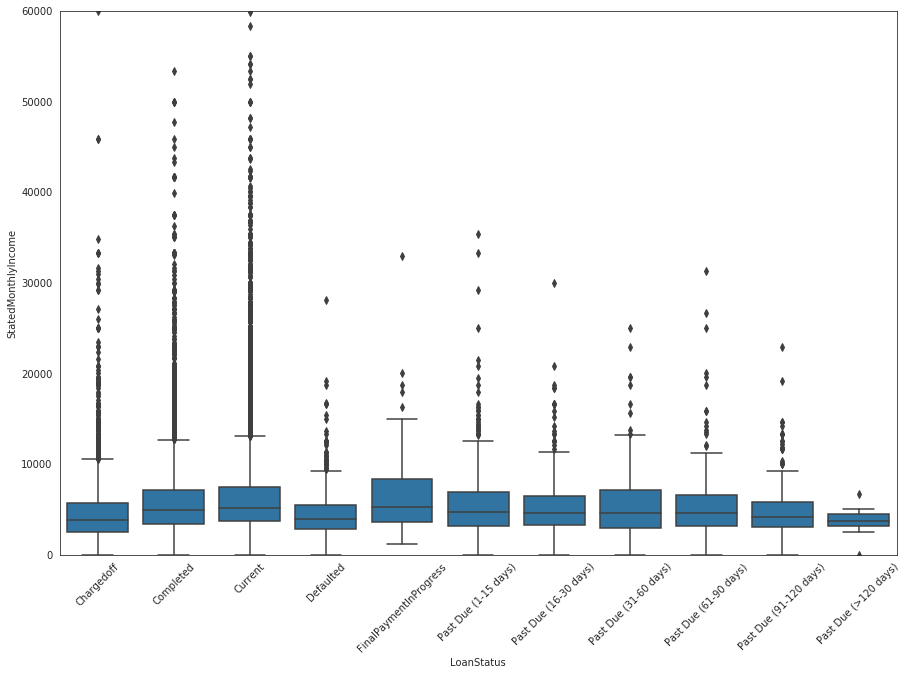

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=loans_after_july_2009, x='LoanStatus', y='StatedMonthlyIncome',
                color=default_colour);
plt.xticks(rotation=45);
plt.ylim(0,60000);
# The Median Monthly Income was almost the same across the various LoanStatus.
# ChargedOff, Completed and Current LoanStatus recorded most of the higher Monthly Income.
# ChargedOff, Defaulted and Past Due (>120 days) Loans had lesser Median Monthly Income.

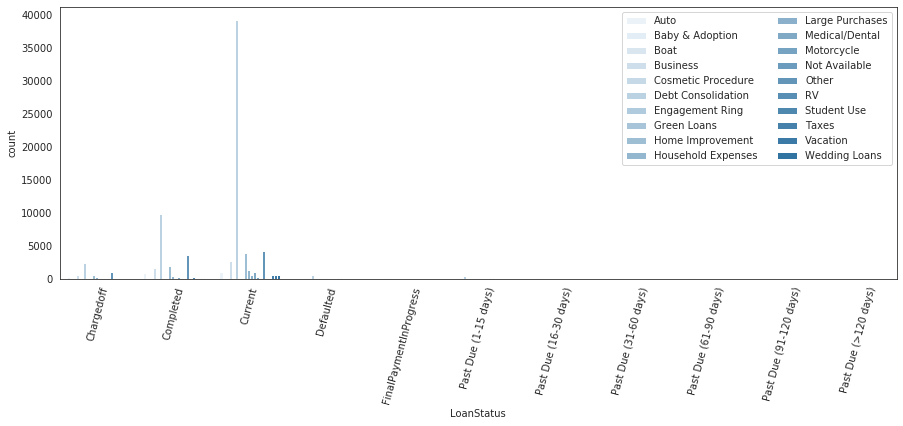

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=loans_after_july_2009, x='LoanStatus', hue='ListingCategory', color=default_colour);
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=75);

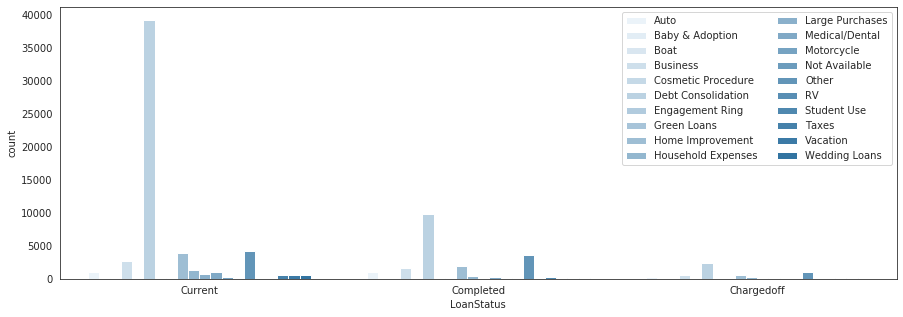

In [40]:
# ListingCategories of top Loan Status
plt.figure(figsize=(15,5))
ax = sns.countplot(x='LoanStatus', hue='ListingCategory',data=loans_after_july_2009,  color=default_colour,
             order=loans_after_july_2009['LoanStatus'].value_counts().iloc[:3].index);
ax.legend(loc = 1, ncol = 2);

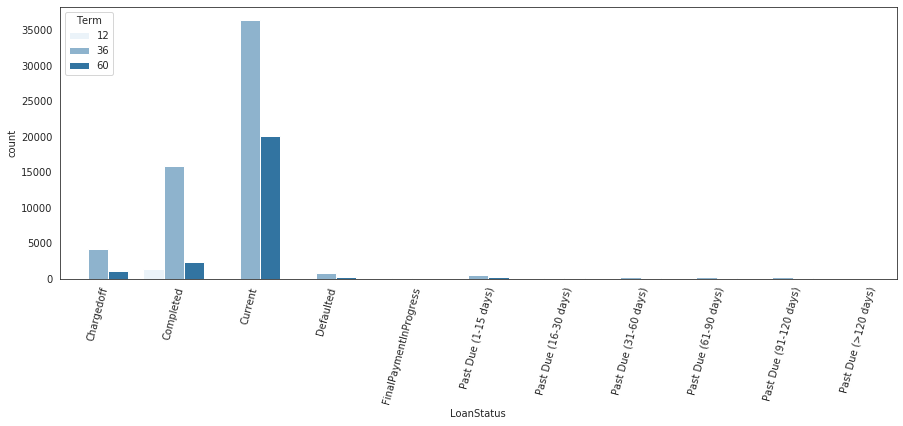

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data=loans_after_july_2009, x='LoanStatus', hue='Term', color=default_colour);
plt.xticks(rotation=75);
# The Chargedoff, Completed and Current Loans all recorded a 36month Term for most of the Loans followed by
# The 60month and 12month Term Respectively.

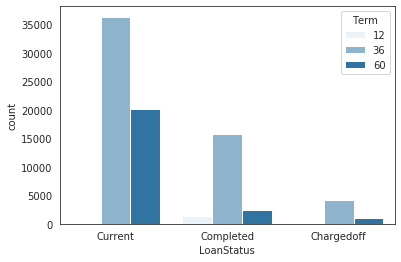

In [42]:
# Terms of top Loan Status
sns.countplot(x='LoanStatus', hue='Term',data=loans_after_july_2009,  color=default_colour,
             order=loans_after_july_2009['LoanStatus'].value_counts().iloc[:3].index);

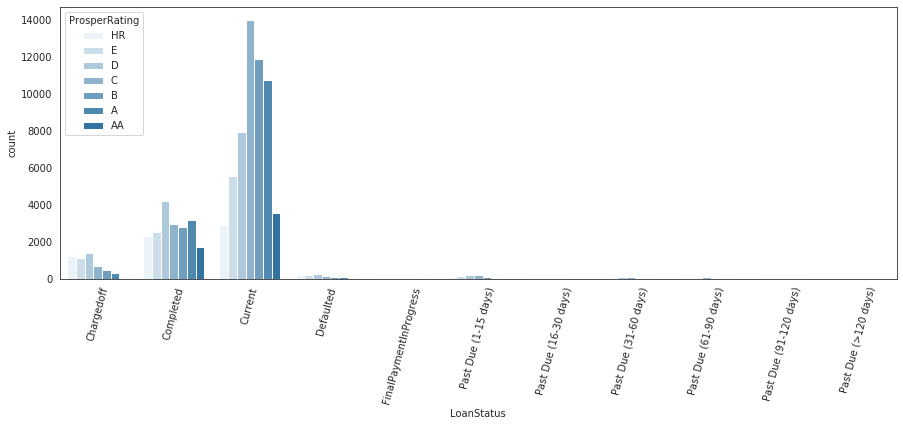

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data=loans_after_july_2009, x='LoanStatus', hue='ProsperRating', color=default_colour);
plt.xticks(rotation=75);

# Most of the Current Loans were rated, **C** and **D** for Completed Loans. The highest for Chargedoff Loans
# was **D** followed by **HR** but with a small difference.

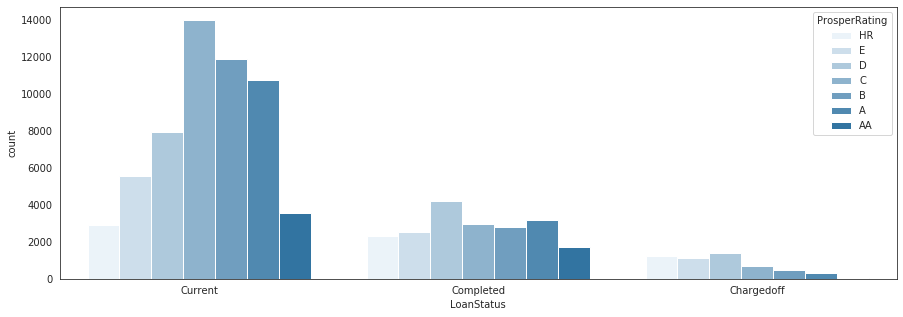

In [44]:
# ProsperRating of top LoanStatus
plt.figure(figsize=(15,5))
ax = sns.countplot(x='LoanStatus', hue='ProsperRating',data=loans_after_july_2009,  color=default_colour,
             order=loans_after_july_2009['LoanStatus'].value_counts().iloc[:3].index);

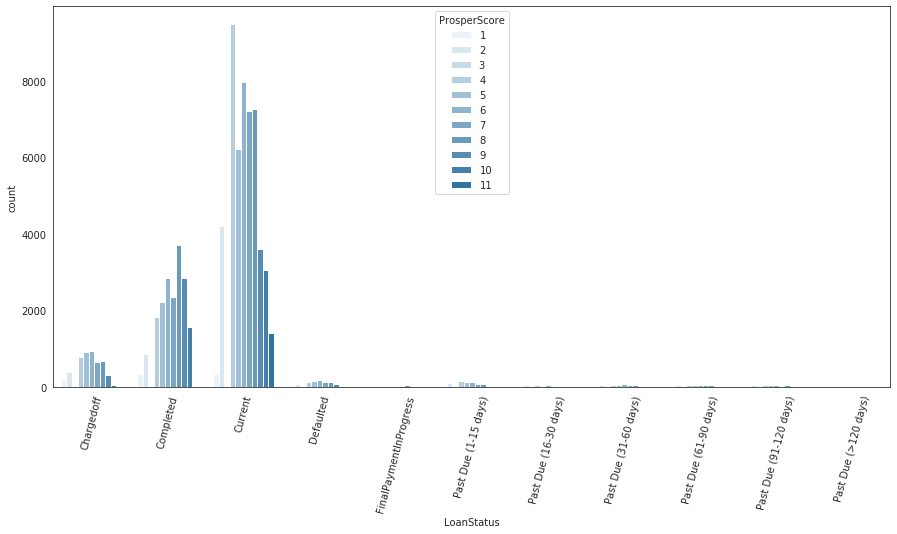

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(data=loans_after_july_2009, x='LoanStatus', hue='ProsperScore', color=default_colour);
plt.xticks(rotation=75);

# Chargedoff Loans appeared to have a normal distribution across the ProsperScore.
# Most Completed Loans were rated 9 while most Current Loans were rated 4.

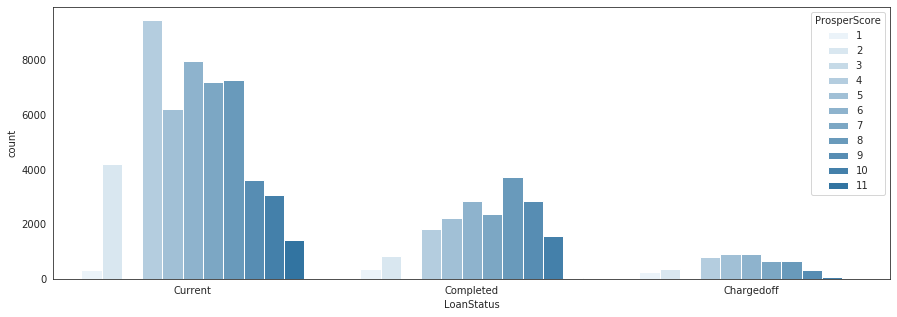

In [46]:
# ProsperScore of top LoanStatus
plt.figure(figsize=(15,5))
ax = sns.countplot(x='LoanStatus', hue='ProsperScore',data=loans_after_july_2009,  color=default_colour,
             order=loans_after_july_2009['LoanStatus'].value_counts().iloc[:3].index);

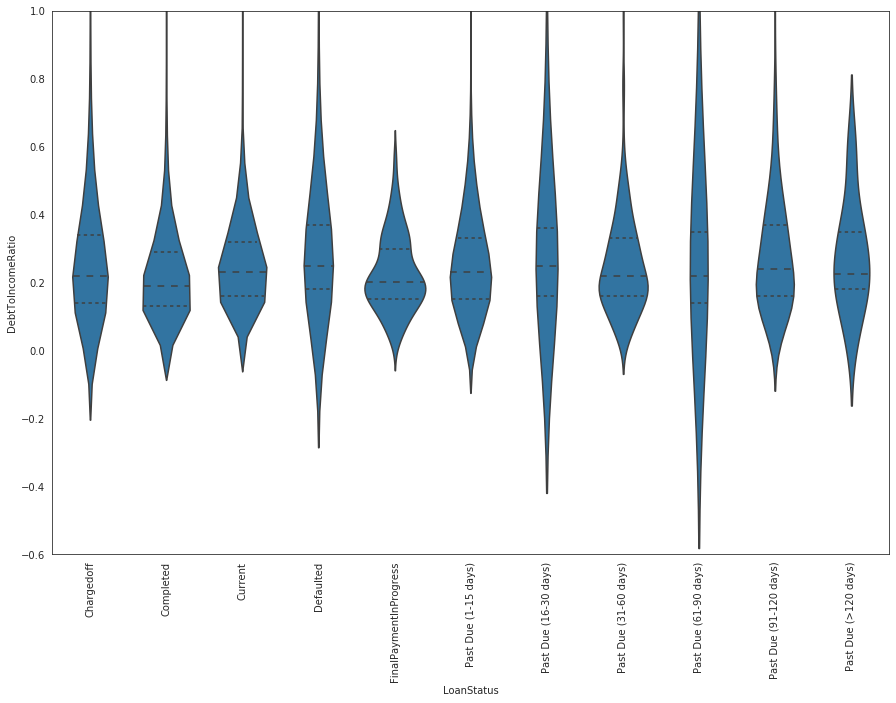

In [47]:
plt.figure(figsize=(15,10))
sns.violinplot(data=loans_after_july_2009, x='LoanStatus', y='DebtToIncomeRatio', color=default_colour,
              inner="quartile");
plt.ylim(-0.6,1.0);
plt.xticks(rotation=90);
# We observe a median DebtToIncomeRatio across the various Loan Status.

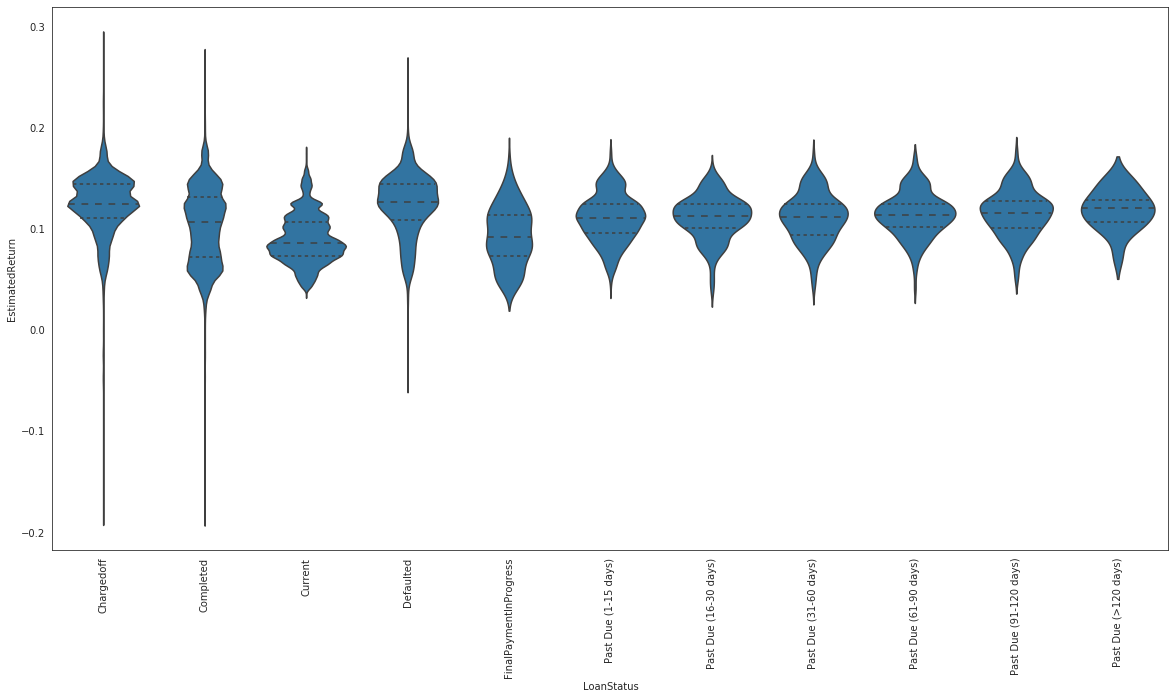

In [48]:
plt.figure(figsize=(20,10))
sns.violinplot(data=loans_after_july_2009, x='LoanStatus', y='EstimatedReturn', color=default_colour,
              inner="quartile");
plt.xticks(rotation=90);
# The Chargedoff and Defaulted Loans has a higher Estimated Return. The Current Loans have a smaller Estimated
# Return. The Completed and FinalPaymentInProgress Loans have a fairly uniform Distibution of EstimatedReturn.
# The remaining categories have an equal distribution of the EstimatedReturn.

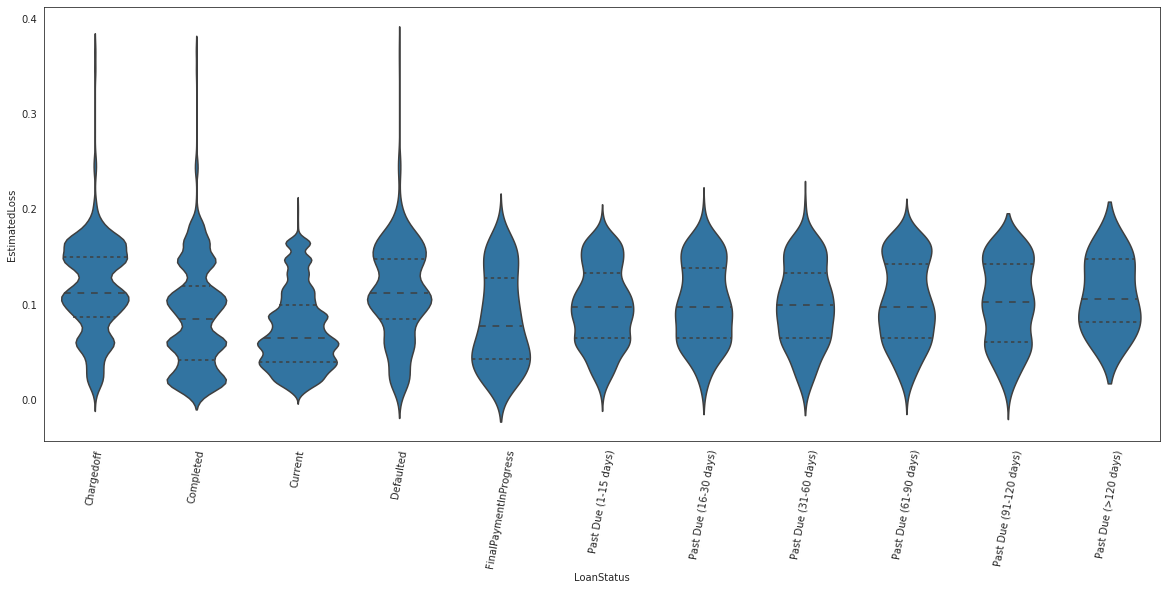

In [49]:
plt.figure(figsize=(20,8))
sns.violinplot(data=loans_after_july_2009, x='LoanStatus', y='EstimatedLoss', color=default_colour,
              inner="quartile");
plt.xticks(rotation=80);
# The Current Loans had a greater number belonging to the lower quartiles of EstimatedLoss. Chargedoff and
# Defaulted Loans have a greater number belonging to the upper quartiles. The remaining share a fairly
# Similar distribution.

### Observations on Relationship Between Loan Status and Other Variables.
* The **Current** Loans had a greater number belonging to the lower quartiles of EstimatedLoss. **Chargedoff and Defaulted** Loans have a greater number belonging to the upper quartiles. The remaining share a fairly Similar distribution.
* The **Chargedoff and Defaulted** Loans has a higher Estimated Return. The **Current** Loans have a smaller Estimated Return. The **Completed and FinalPaymentInProgress** Loans have a fairly uniform Distibution of EstimatedReturn. The remaining categories have an equal distribution of the EstimatedReturn.
* We observe the same Median DebtToIncomeRatio across the various Loan Status.
* Chargedoff Loans appeared to have a normal distribution across the ProsperScore. Most Completed Loans were rated 9 while most Current Loans were rated 4.
* Most of the Current Loans were rated, **C** and **D** for Completed Loans. The highest for Chargedoff Loans was **D** followed by **HR** but with a small difference.
* The Chargedoff, Completed and Current Loans all recorded a 36month Term for most of the Loans followed by The 60month and 12month Term Respectively.
* Most of the loans in the ChargedOff, Completed and Defaulted Status had Smaller LoanOriginalAmount. We have to find out why these small loans couldn't be paid off but had to be Defaulted or ChargedOff.
* The Median Monthly Income was almost the same across the various LoanStatus. ChargedOff, Completed and Current LoanStatus recorded most of the higher Monthly Income. ChargedOff, Defaulted and Past Due (>120 days) Loans had smaller Median Monthly Income.

## Multivariate Exploration

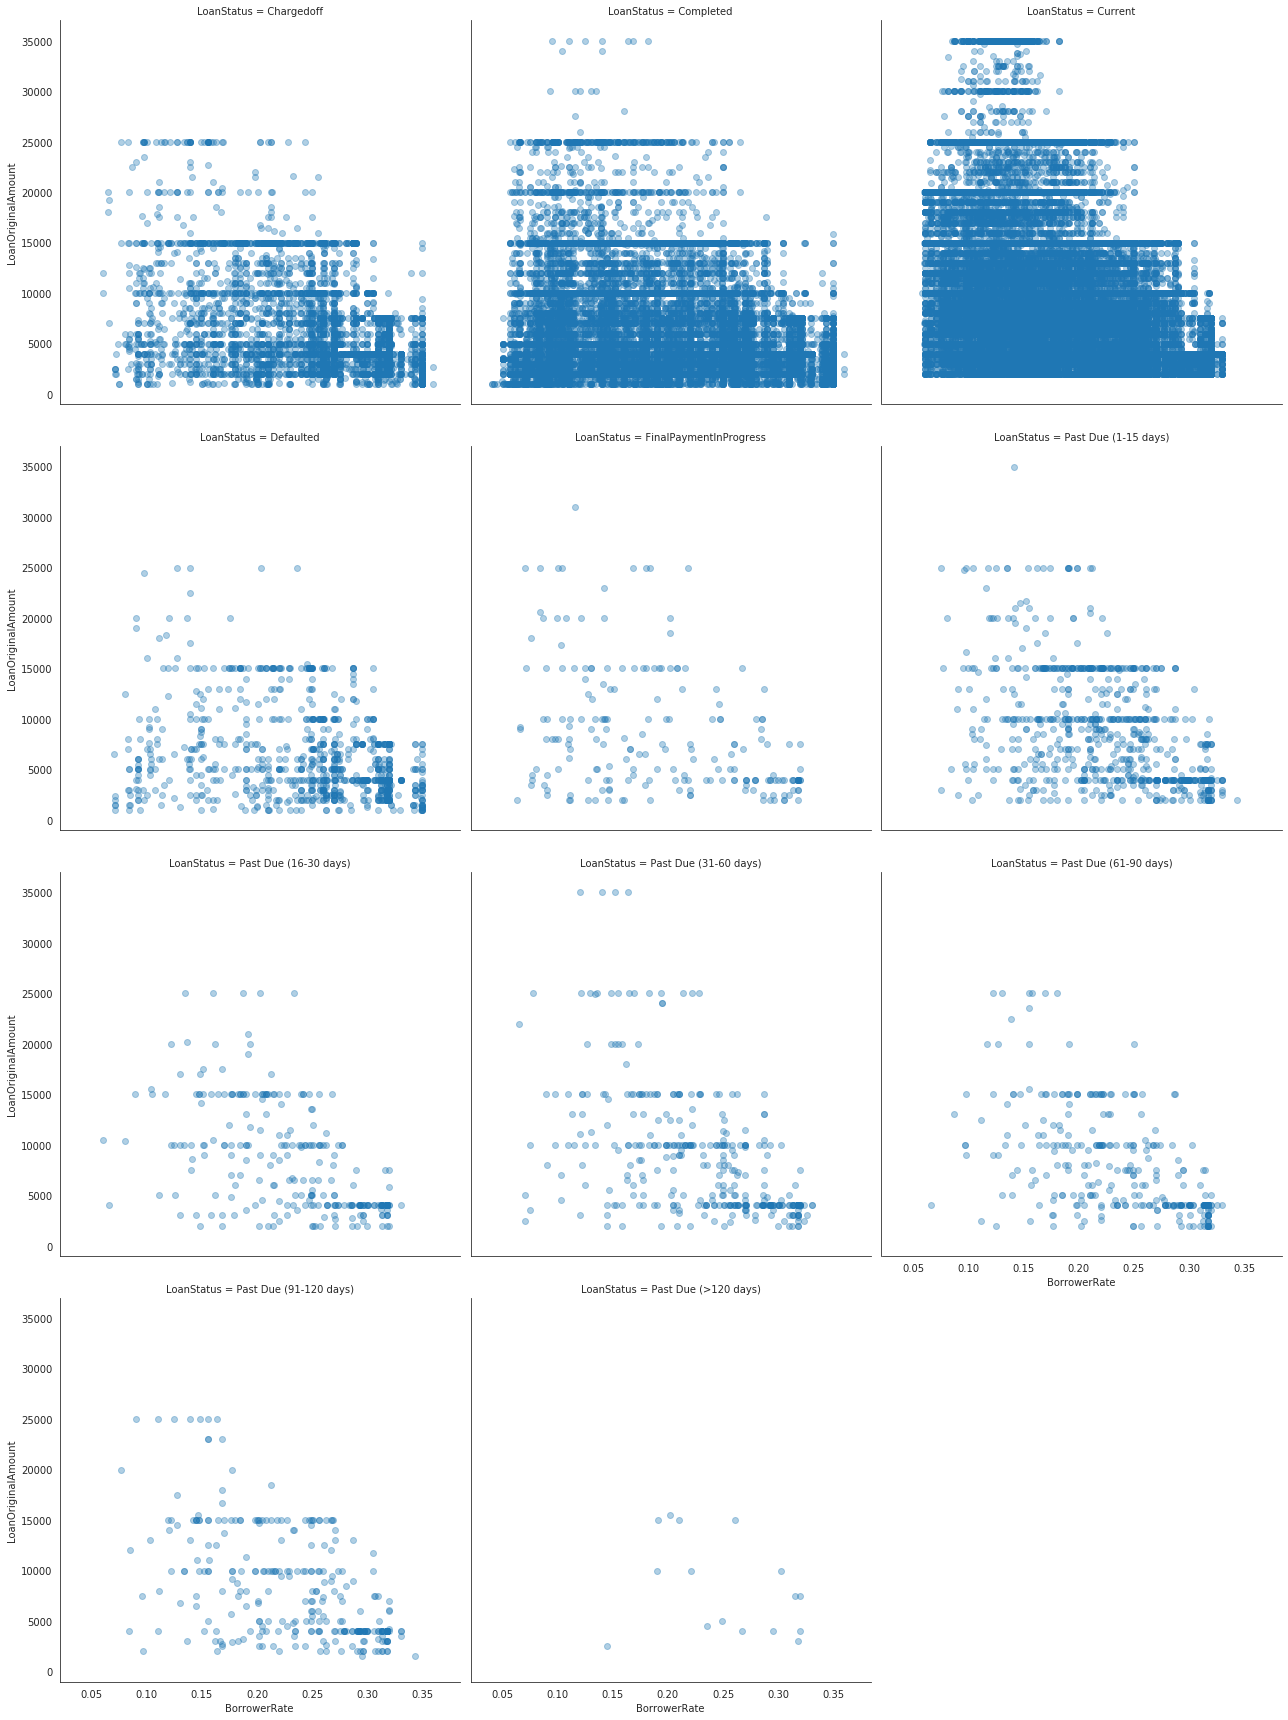

In [50]:
# LoanOriginalAmount, LoanStatus, BorrowerRates
# plt.figure(figsize=[20,10])
g = sns.FacetGrid(data = loans_after_july_2009, col = 'LoanStatus', height = 6, col_wrap=3)
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount', alpha=0.35);
# For  **Completed and Current Loans** we observe that the high LoanOriginalAmounts have a smaller
# BorrowerRates. The remaining Listing Status appear to have higher BorrowerRates. As observed early on,
# Most of the LoanOriginalAmounts are below 15,000 USD.

/home/mupati/anaconda3/envs/datascience/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


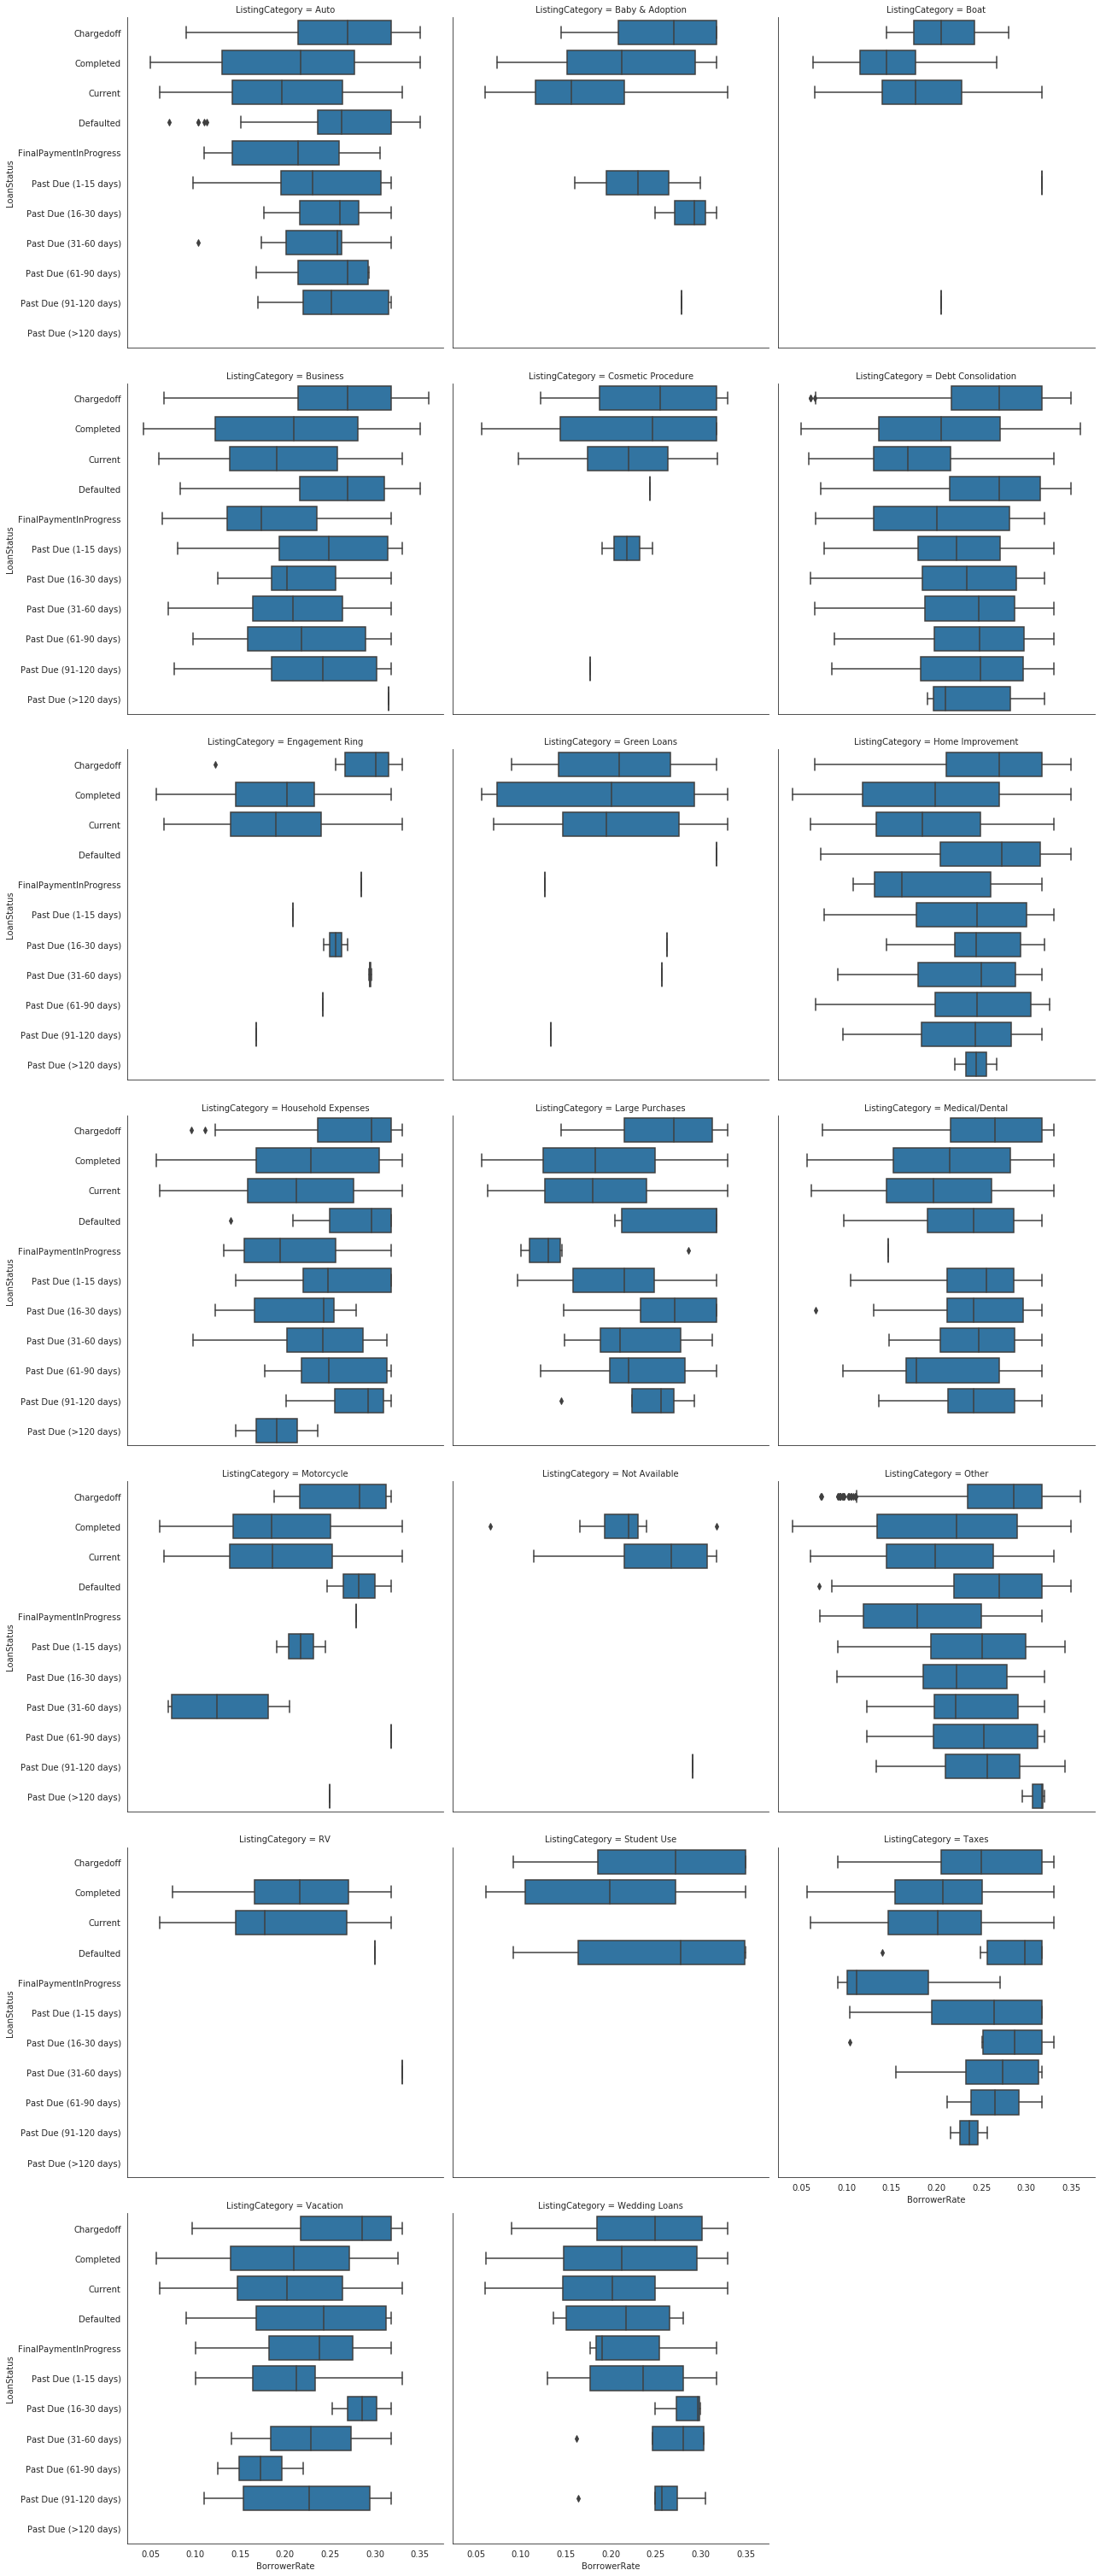

In [51]:
# ListingCategory, LoanStatus, BorrowerRates
g = sns.FacetGrid(data = loans_after_july_2009, col = 'ListingCategory', height = 6, col_wrap=3)
g.map(sns.boxplot, 'BorrowerRate', 'LoanStatus');

# The **Debt Consolidation, Other, Home Improvement, Business and Auto** Listings have a highest BorrowerRate
# Median for the Chargedoff and Defaulted Loans.

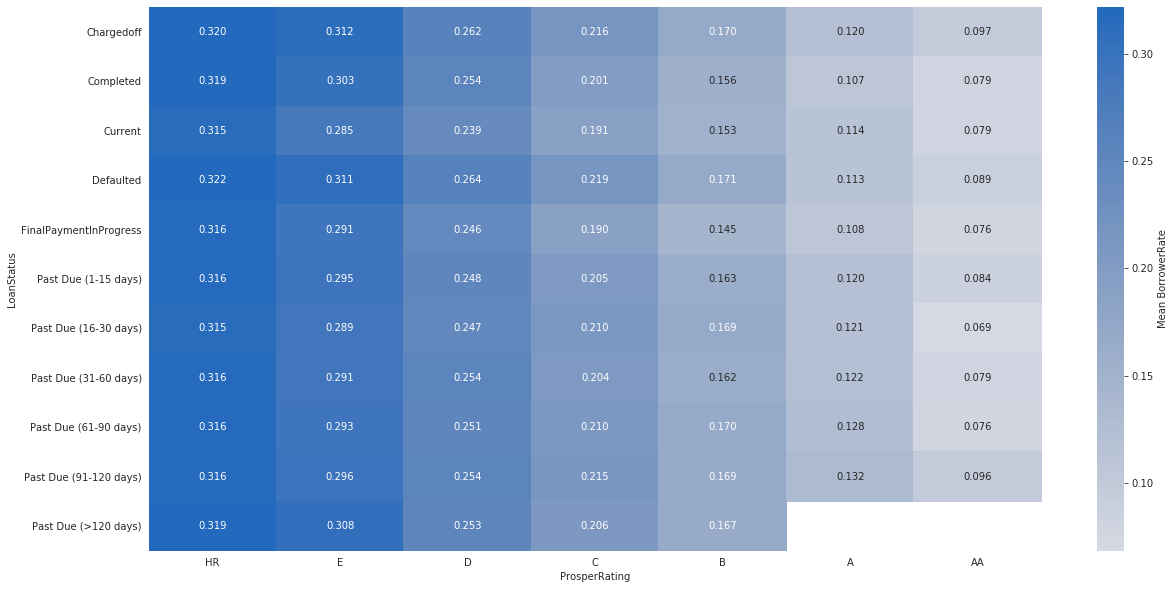

In [52]:
# ProsperRating, LoanStatus, BorrowerRates
plt.figure(figsize=[20,10])
cat_means = loans_after_july_2009.groupby(['ProsperRating', 'LoanStatus']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'borrower_rate_avg')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'ProsperRating',
                            values = 'borrower_rate_avg')
ax = sns.heatmap(cat_means, annot = True, fmt = '.3f',cmap = 'vlag_r', center= 0,
           cbar_kws = {'label' : 'Mean BorrowerRate'})
ax.set_ylim(11,0);

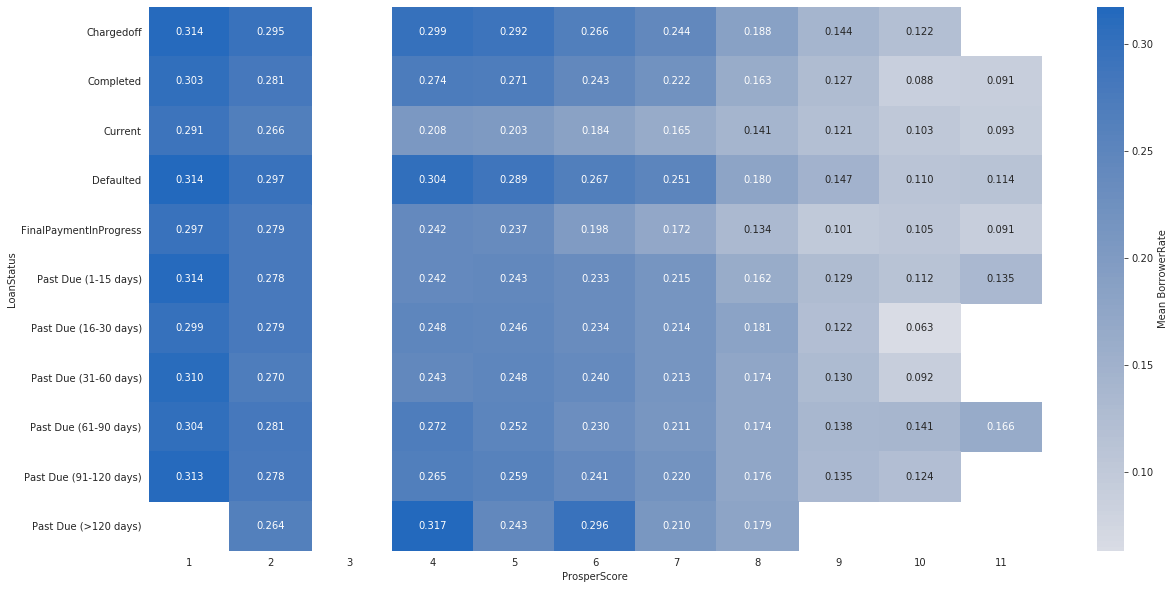

In [53]:
# ProsperScore, LoanStatus, BorrowerRates
plt.figure(figsize=[20,10])
cat_means = loans_after_july_2009.groupby(['ProsperScore', 'LoanStatus']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'borrower_rate_avg')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'ProsperScore',
                            values = 'borrower_rate_avg')
ax = sns.heatmap(cat_means, annot = True, fmt = '.3f',cmap = 'vlag_r', center= 0,
           cbar_kws = {'label' : 'Mean BorrowerRate'})
ax.set_ylim(11,0);

### Observations from Multivariate Exploration
* **Defaulted and Chargedoff** Loans have high BorrowerRates and lower ProsperScores (high risk scores). As we move from high risk to low risk along for the Prosper Scores, we observe that the BorrowerRates also decrease. Early on we observed that the LoanOriginalAmount for the **Defaulted and Chargedoff** Loans were smaller but the high BorrowerRates might explain why those Loans were **Chargedoff or Defaulted**. This observation can be made from the ProsperRatings too as you move from **HR** to **AA**.
* The **Debt Consolidation, Other, Home Improvement, Business and Auto** Listings have a highest BorrowerRate Median for the Chargedoff and Defaulted Loans.
* For **Completed and Current Loans** we observe that the high LoanOriginalAmounts have a smaller BorrowerRates. The remaining Listing Categories appear to have higher BorrowerRates. As observed early on, Most of the LoanOriginalAmounts are below 15,000 USD.